# Imports and initialization

In [17]:
import sys
import os
import cv2
import matplotlib.pyplot as plt

from pathlib import Path
sys.path.insert(0, os.path.abspath(".."))

In [18]:
from application_flask.model_inference import Embedding_generator
from application_flask.search import HNSW_search_tool
from application_flask.image_processing import Image_processer

In [19]:
EMBEDDING_DATA_PATH = Path('../data/embeddings')
EXAMPLE_FOLDER_PATH = Path('../examples')

model_interface = Embedding_generator()
hnsw_search = HNSW_search_tool(768, 'cosine', EMBEDDING_DATA_PATH / 'hnsw_index_cos.bin', 50, EMBEDDING_DATA_PATH / 'image_emb_metadata.json')
image_processer = Image_processer(None)

Model has loaded
Search Engine has loaded
Image Processer has loaded


# Inference

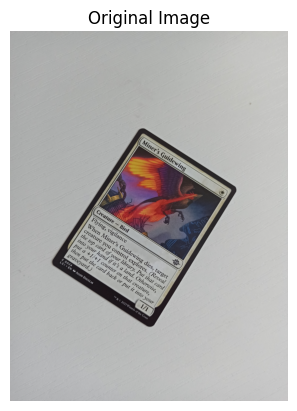

In [25]:
image_path = EXAMPLE_FOLDER_PATH / 'example_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.title('Original Image')
plt.imshow(image)

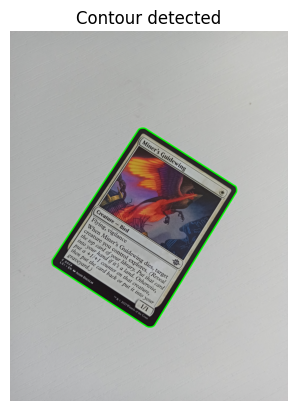

In [26]:
contour_image, contours = image_processer.find_big_contours(image)
plt.axis('off')
plt.title('Contour detected')
plt.imshow(contour_image)

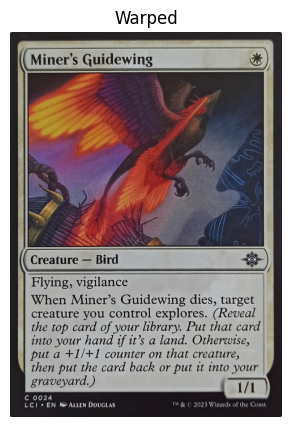

In [27]:
fig, ax = plt.subplots(1, len(contours), figsize=(15, 5))

if len(contours) == 1:
    ax = [ax]
crops = []
for i, contour in enumerate(contours):
    warped = image_processer.crop_warp_image_from_contour(image, contour)
    crops.append(warped)
    plt.title('Warped')
    ax[i].imshow(warped)
    ax[i].axis('off')

In [23]:
image_embeddings = model_interface.generate_image_embedding(crops)
image_embeddings.shape

(1, 768)

In [24]:
results = [hnsw_search.search_in_hnsw(embedding, k=200)[0] for embedding in image_embeddings]
print(*results)

{'card_number': '24', 'card_set': 'lci', 'card_name': "Miner's Guidewing", 'card_language': 'en', 'card_side': None}
